In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from matplotlib import rc
import matplotlib.font_manager
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=1.5, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-14, 10)
alpha=1
marker='o'
s=10
legend=False
linewidth=0

In [3]:
df = pd.read_csv("../results/counts/alignment.sorted.filtered/counts.tsv",
                 header=0,
                 sep="\t")
df.set_index("Name", inplace=True)
df.columns = df.columns.str.replace("counts_", "")

In [4]:
df.head()

,wild_type_A,wild_type_B,wild_type_C,wild_type_D,wild_type_E,wild_type_F,Dpf_3_null_A,Dpf_3_null_B,Dpf_3_null_C,Dpf_3_S784A_A,...,wild_type_I,alg_4_alg_3_A,alg_4_alg_3_B,alg_4_alg_3_C,mut_2_A,mut_2_B,mut_2_C,mut_7_A,mut_7_B,mut_7_C
Name,,,,,,,,,,,,,,,,,,,,,
CTTAGGCTTAGGCTTAGGCTTAGGCTTAGG,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TAGGCTTAGGCTTAGGCTTAGGCTTAGG,1.0,4.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0
TAGGCTTAGGCTTAGG,1.0,1.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,4.0,4.0,0.0,0.0,1.0,6.0,4.0,2.0
TAGGCTTAGGCTTAGGCTTAGGCTTAGGCTTAGGCTTAGG,1.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,3.0,4.0,...,4.0,2.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,5.0
TTAGGCTTAGGCTTAGG,1.0,0.0,2.0,3.0,0.0,1.0,2.0,0.0,1.0,0.0,...,2.0,0.0,7.0,0.0,2.0,0.0,0.0,2.0,4.0,3.0


In [5]:
df.shape

(4249416, 24)

In [6]:
conditions = list(df.columns)

# Library size

In [7]:
library_size = pd.DataFrame(df[conditions].sum())
library_size.reset_index(inplace=True)
library_size.columns = ["sample", "library_size"]
library_size.set_index("sample", inplace=True)

Text(0.5, 0, 'Number of reads')

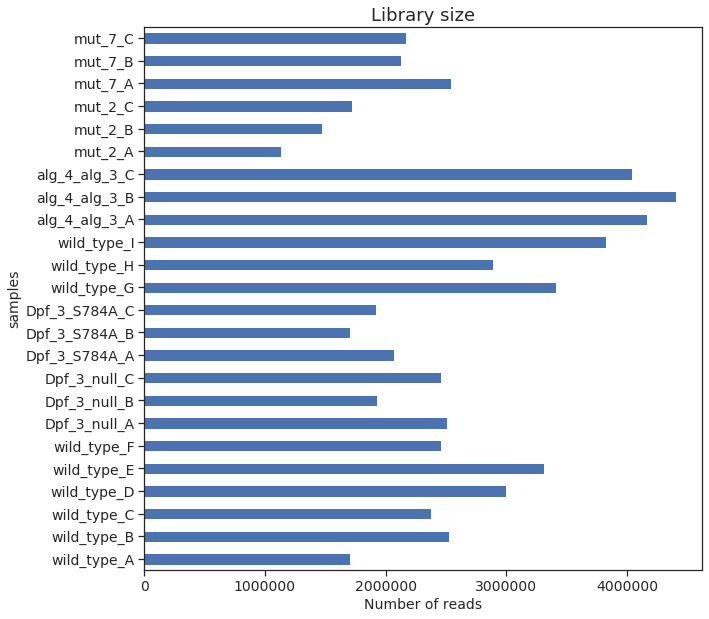

In [8]:
ax = library_size.plot(kind="barh", figsize=(10,10), title="Library size", legend=False, fontsize=14)
ax.set_ylabel("samples", fontsize=14)
ax.set_xlabel("Number of reads", fontsize=14)

In [9]:
library_size_full = library_size

# Library size 22G

In [10]:
df_22G = df[(df.index.str.startswith("G")) & (df.index.str.len()==22)]

In [11]:
library_size = pd.DataFrame(df_22G[conditions].sum())
library_size.reset_index(inplace=True)
library_size.columns = ["sample", "library_size"]
library_size.set_index("sample", inplace=True)

Text(0.5, 0, 'Number of reads')

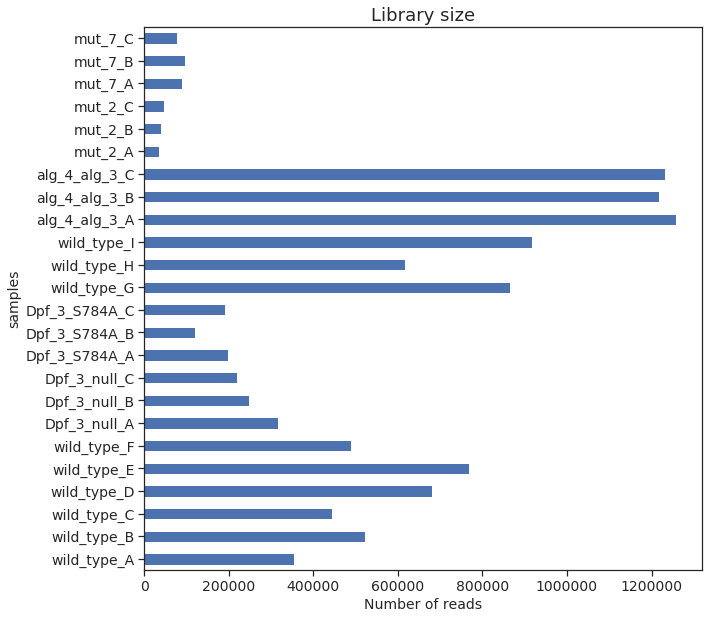

In [12]:
ax = library_size.plot(kind="barh", figsize=(10,10), title="Library size", legend=False, fontsize=14)
ax.set_ylabel("samples", fontsize=14)
ax.set_xlabel("Number of reads", fontsize=14)

# Normalize data for 22G RNAs

In [13]:
# filter
df_22G = df_22G[df_22G.sum(axis=1)>20]

In [14]:
# normalize (based on the total library size)
df_22G = (df_22G/df.sum(axis=0)) * (df.sum(axis=0).mean())
# pseudocount and log transform
df_22G = df_22G + 8
df_22G = np.log2(df_22G)

In [15]:
df_22G.shape

(67444, 24)

In [16]:
df_22G.head()

,wild_type_A,wild_type_B,wild_type_C,wild_type_D,wild_type_E,wild_type_F,Dpf_3_null_A,Dpf_3_null_B,Dpf_3_null_C,Dpf_3_S784A_A,...,wild_type_I,alg_4_alg_3_A,alg_4_alg_3_B,alg_4_alg_3_C,mut_2_A,mut_2_B,mut_2_C,mut_7_A,mut_7_B,mut_7_C
Name,,,,,,,,,,,,,,,,,,,,,
GTTGATCCGTTCTATCTCCAGA,4.216547,3.467400,3.345911,4.053928,3.474497,3.727406,3.329384,3.586418,3.000000,3.553577,...,3.324812,3.207365,3.729883,3.484113,3.0,3.0,3.0,3.0,3.0,3.0
GATCCTCCGGAGCGCGTCGAAT,3.462844,3.711664,3.746213,3.810092,3.572203,4.034959,3.174072,3.223016,3.000000,3.000000,...,3.000000,3.623886,3.101875,3.399423,3.0,3.0,3.0,3.0,3.0,3.0
GGAGCGCGTCGAATCAATGTTT,4.094080,3.327776,3.000000,3.403652,3.663709,3.177767,3.000000,3.000000,3.000000,3.000000,...,3.324812,3.761794,3.596620,3.110691,3.0,3.0,3.0,3.0,3.0,3.0
GCGTCGAATCAATGTTTCCGGA,3.462844,3.327776,3.746213,3.281235,3.749757,3.336014,3.000000,3.000000,3.177699,3.699220,...,3.000000,3.549651,3.525070,3.564106,3.0,3.0,3.0,3.0,3.0,3.0
GAAAATTTAAGCGTAGAACATC,3.462844,3.000000,3.345911,3.147460,3.572203,3.177767,3.174072,3.000000,3.000000,3.391563,...,3.589766,3.000000,3.370353,3.110691,3.0,3.0,3.0,3.0,3.0,3.0


# PCA

In [17]:
df_22G.shape

(67444, 24)

In [18]:
scaled_data = preprocessing.scale(df_22G.T)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]), <a list of 24 Text xticklabel objects>)

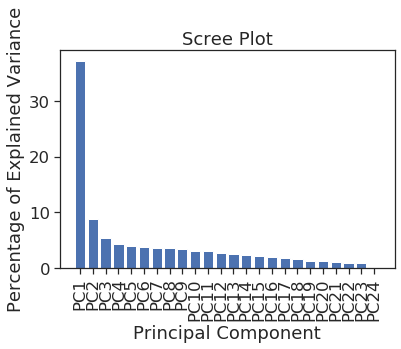

In [19]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure()
plt.rcParams["figure.figsize"] = (20,20)
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)    
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation='vertical')

In [20]:
pca_df = pd.DataFrame(pca_data, index=[*df_22G], columns=labels)

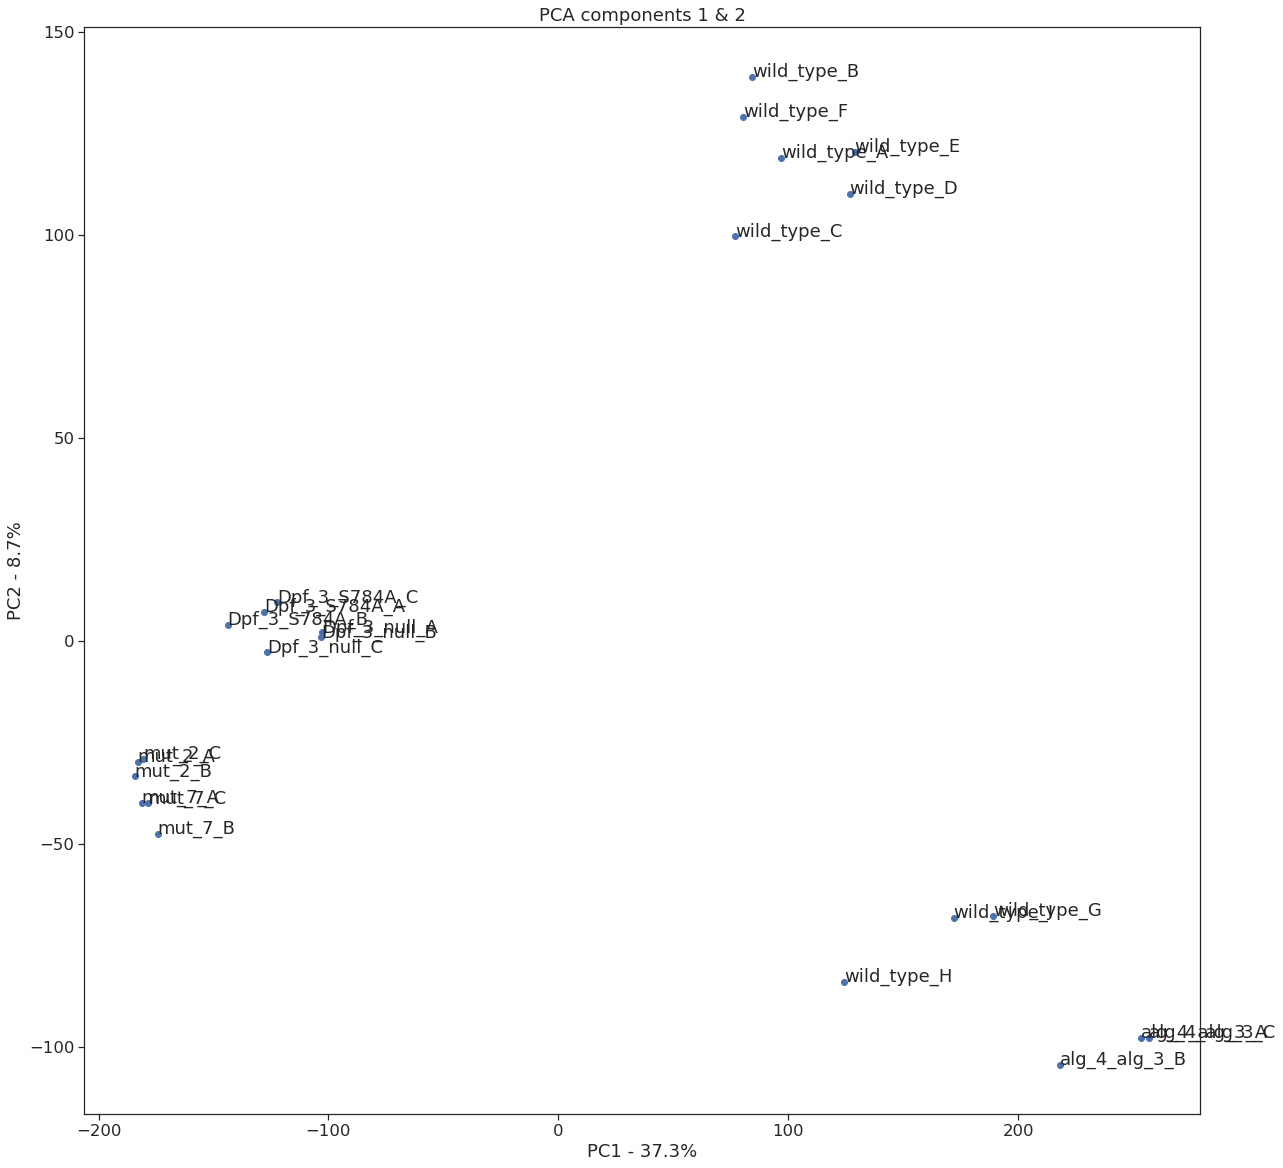

In [21]:
plt.figure()
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.title('PCA components 1 & 2')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

# Clustermap

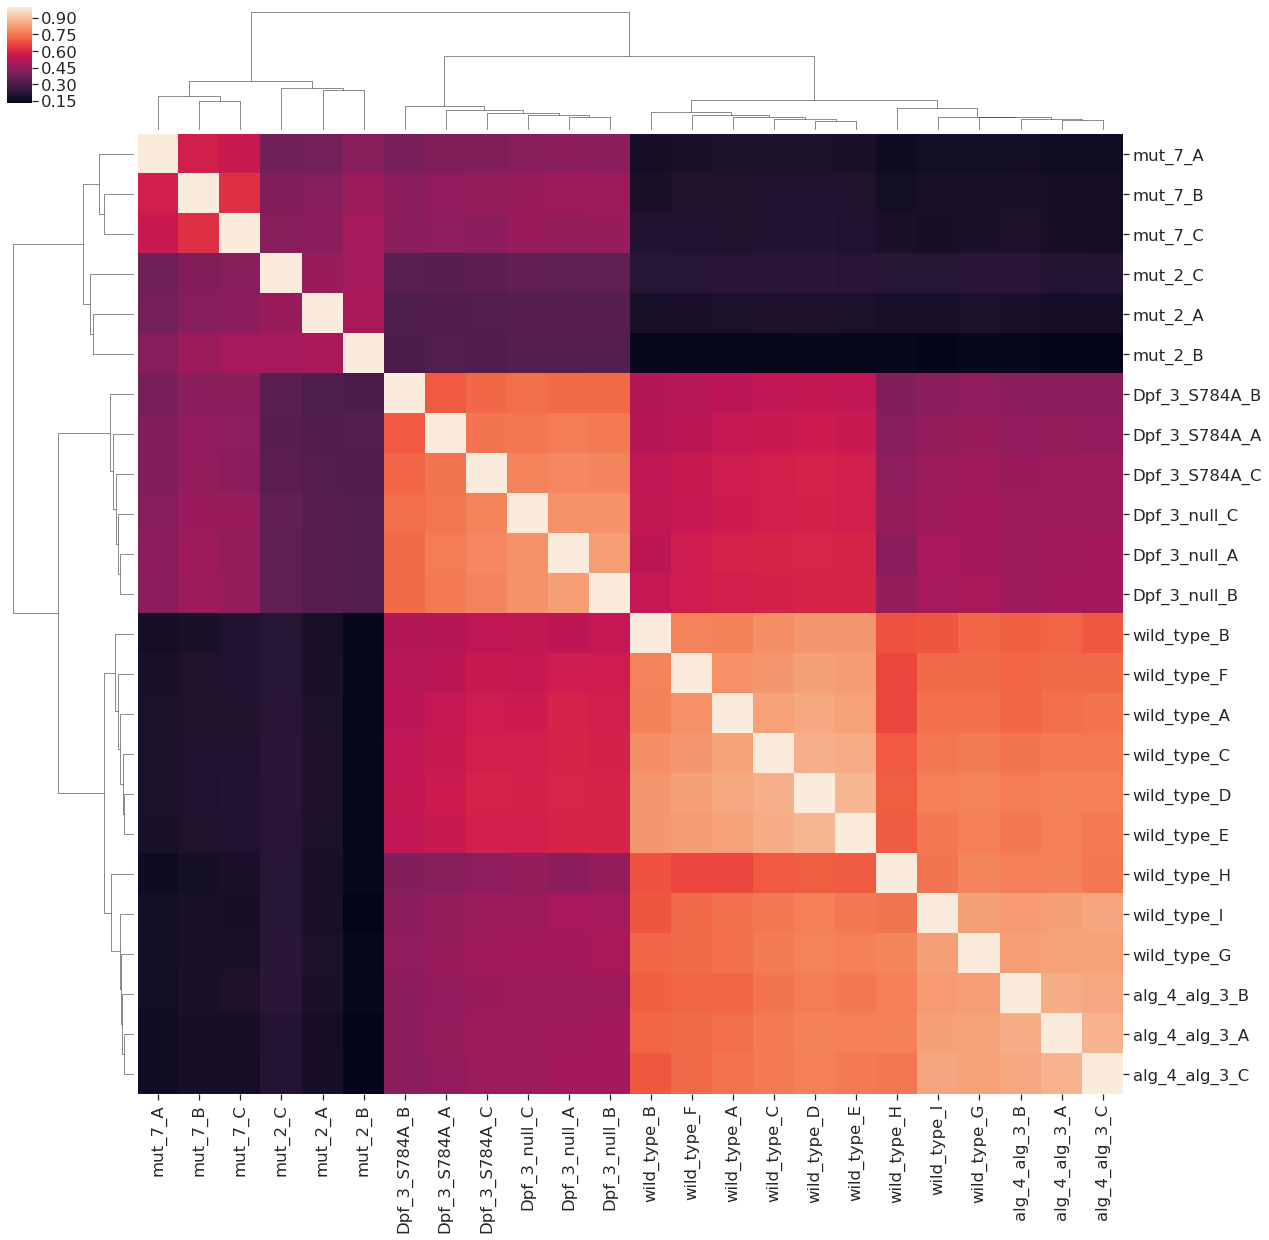

In [22]:
g = sns.clustermap(df_22G.corr(method="pearson"), figsize=(20,20))

# Pairplot and scatter plots

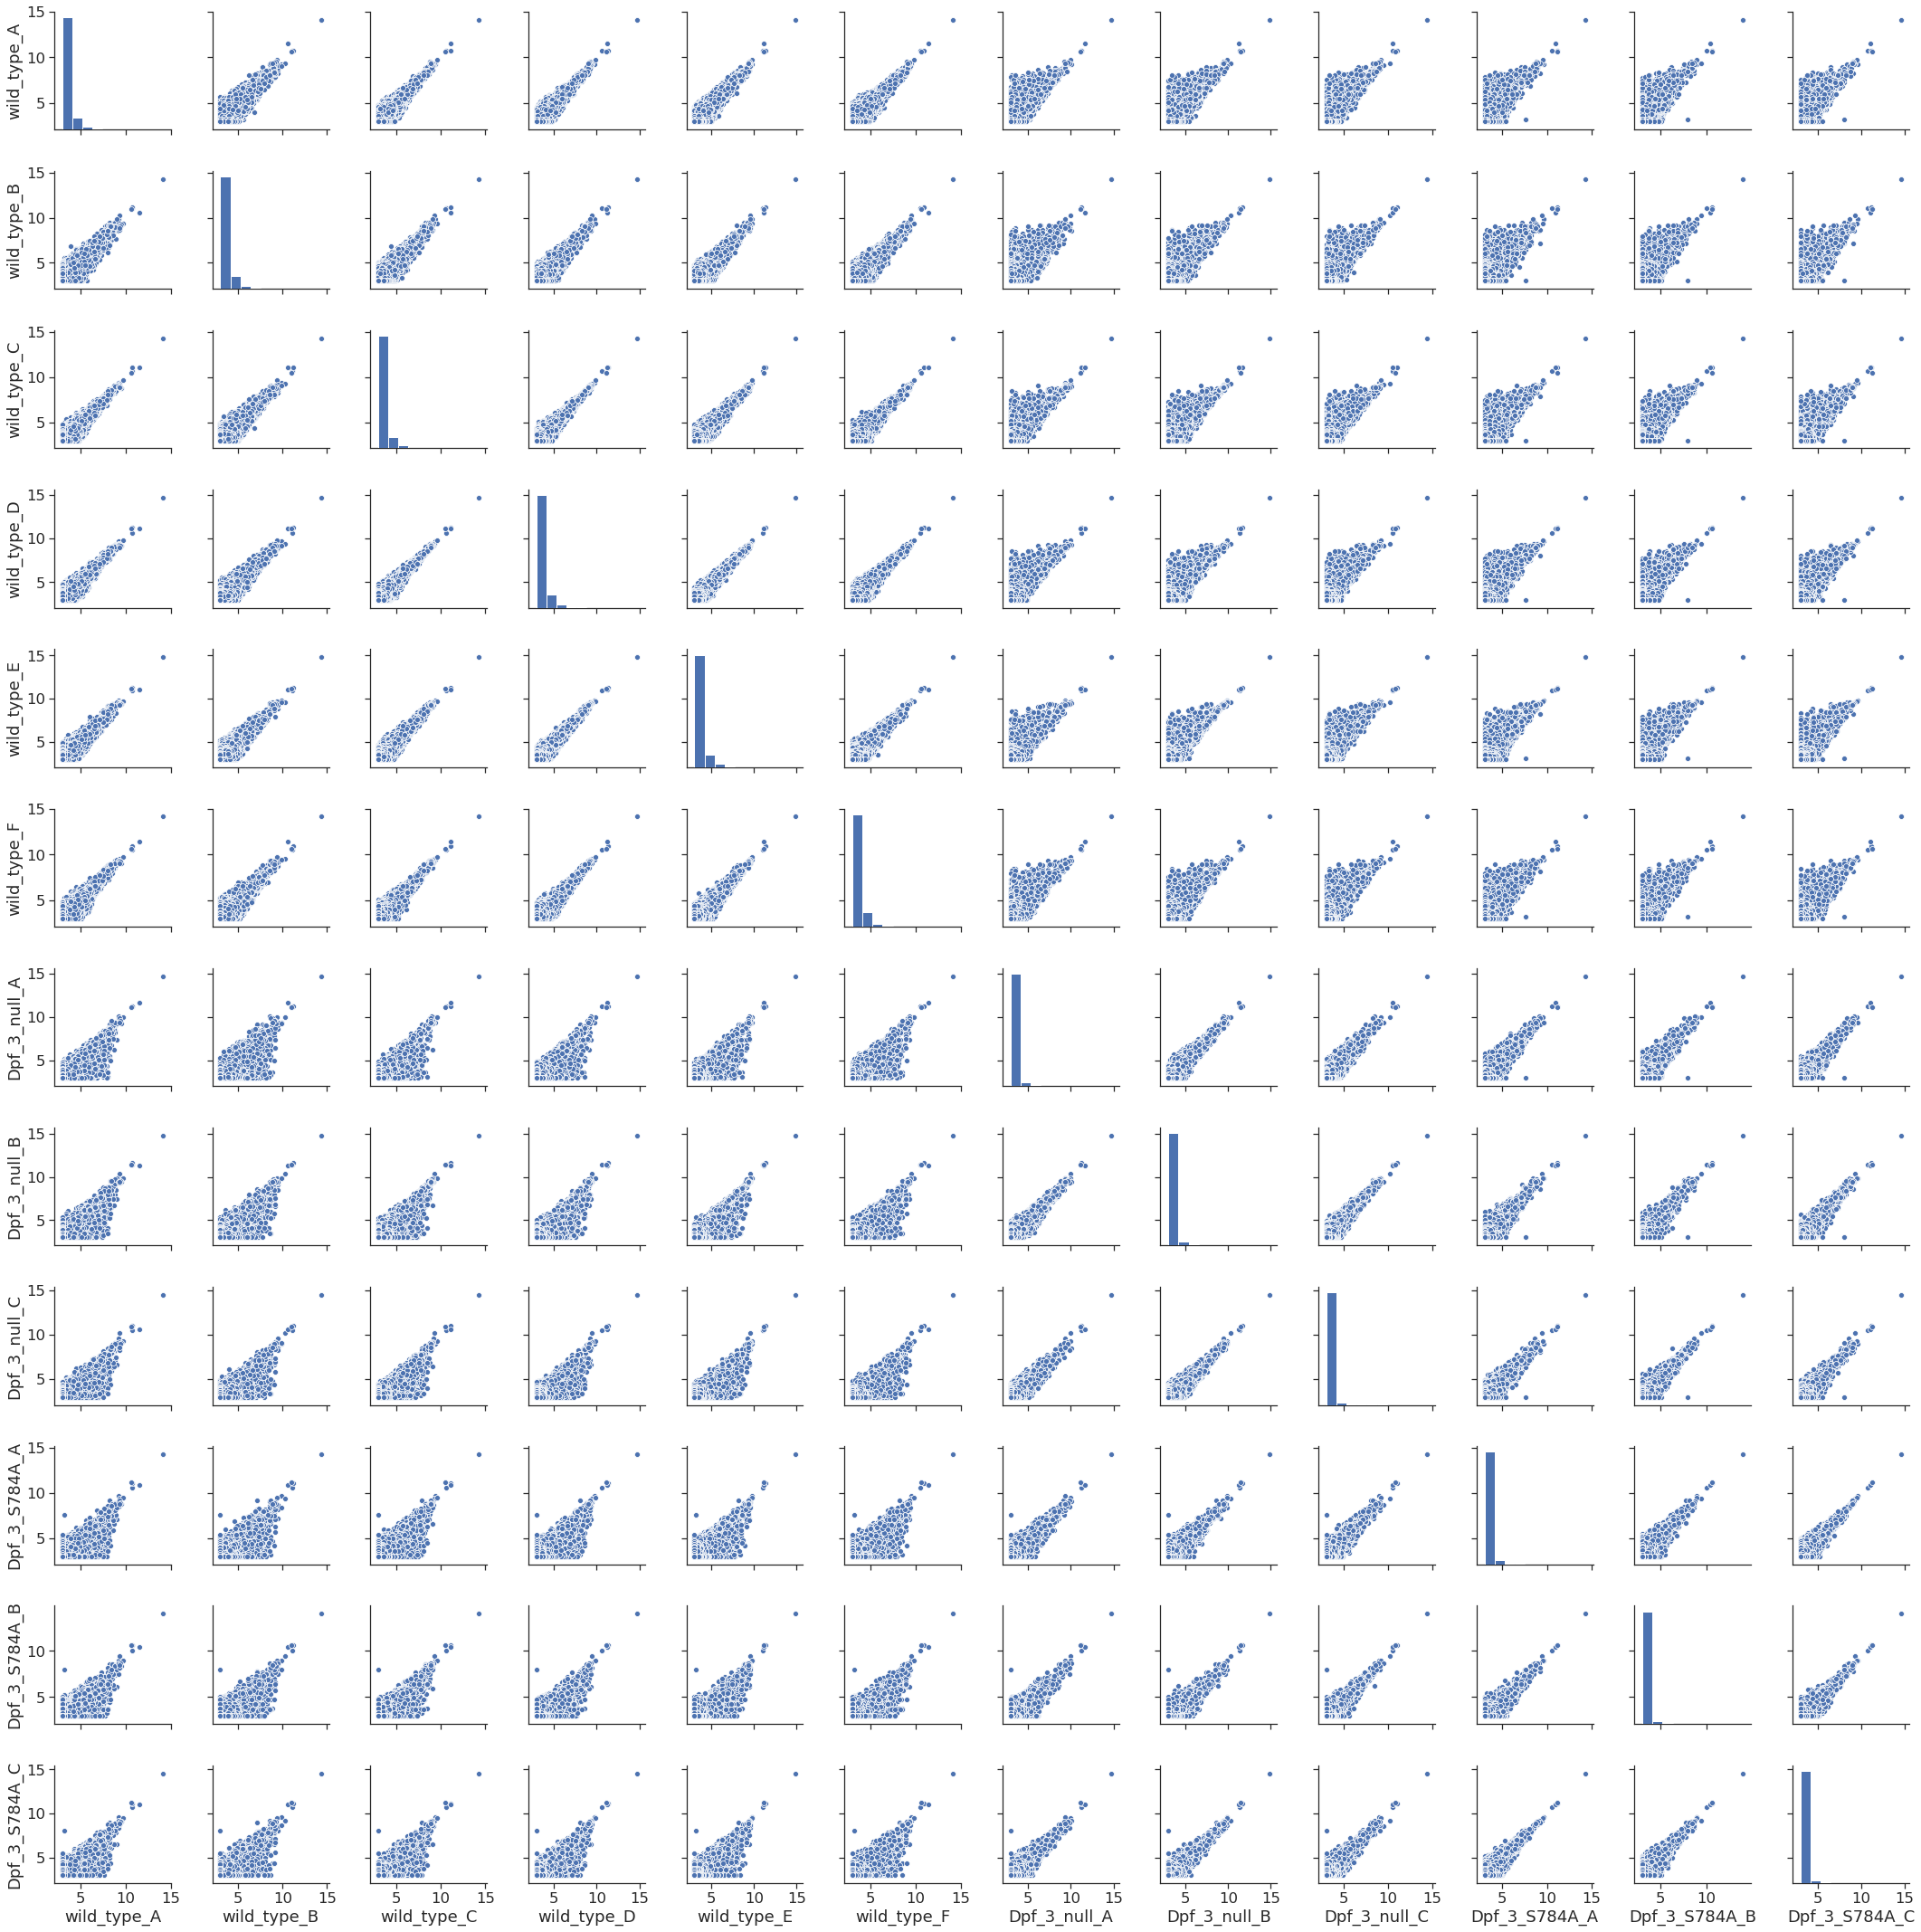

In [23]:
sns.pairplot(df_22G[["wild_type_A", "wild_type_B", "wild_type_C", "wild_type_D", "wild_type_E", "wild_type_F", "Dpf_3_null_A",	"Dpf_3_null_B",	"Dpf_3_null_C", "Dpf_3_S784A_A", "Dpf_3_S784A_B", "Dpf_3_S784A_C"]])

In [24]:
df_22G["log2(mean_WT)"] = df_22G[["wild_type_A", "wild_type_B", "wild_type_C", "wild_type_D", "wild_type_E", "wild_type_F"]].mean(axis=1)
df_22G["log2(mean_Dpf_3_null)"] = df_22G[["Dpf_3_null_A",	"Dpf_3_null_B",	"Dpf_3_null_C"]].mean(axis=1)
df_22G["log2(mean_Dpf_3_S784A)"] = df_22G[["Dpf_3_S784A_A", "Dpf_3_S784A_B", "Dpf_3_S784A_C"]].mean(axis=1)

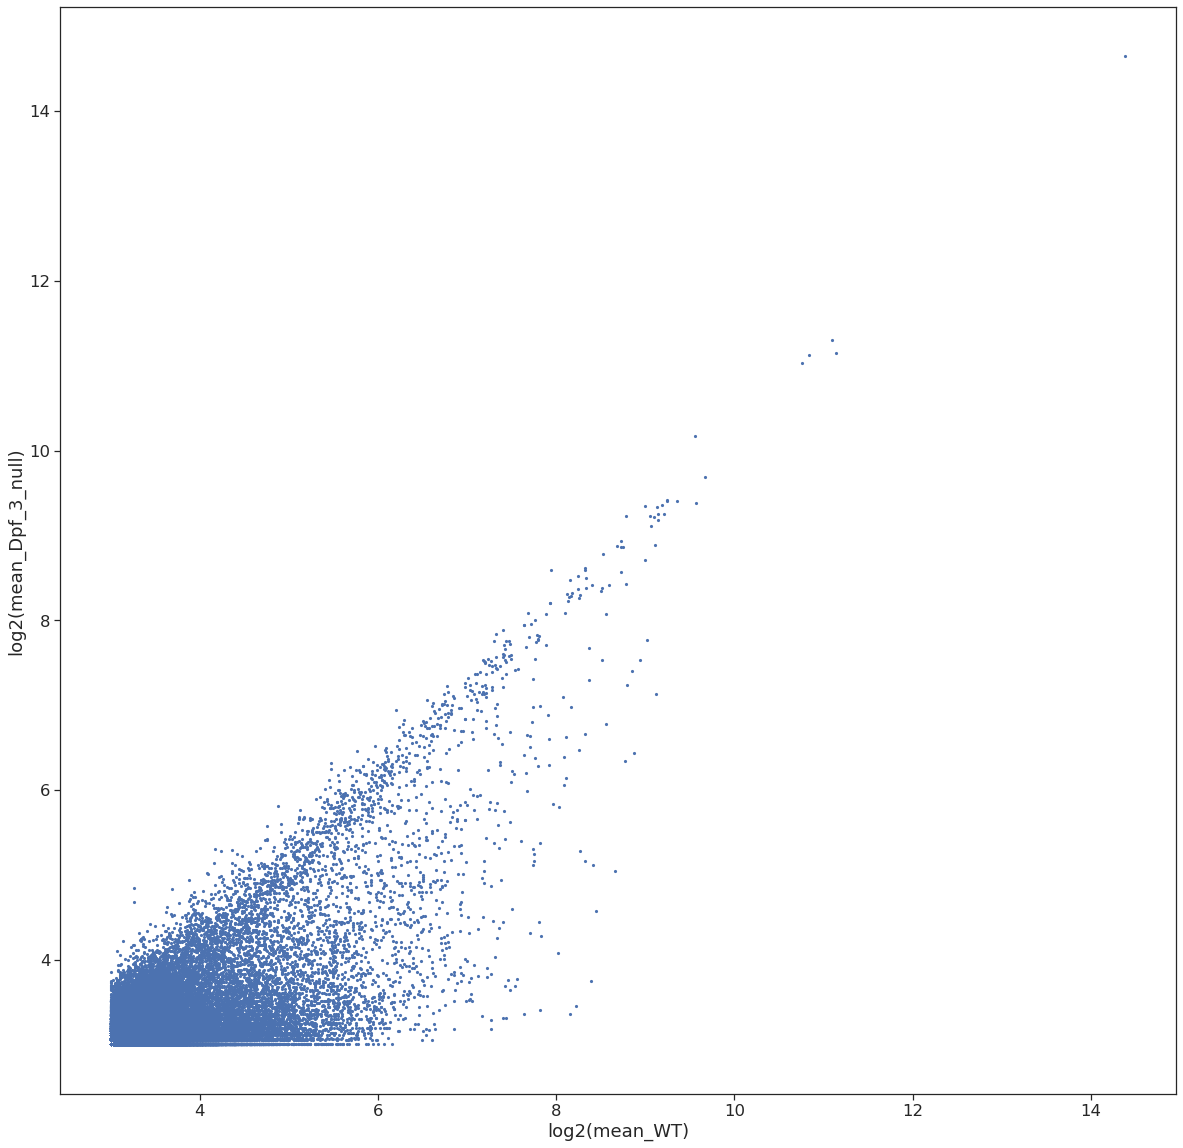

In [25]:
sns_plot = sns.scatterplot(x="log2(mean_WT)",
                           y="log2(mean_Dpf_3_null)",
                           data=df_22G,
                           s=s,
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

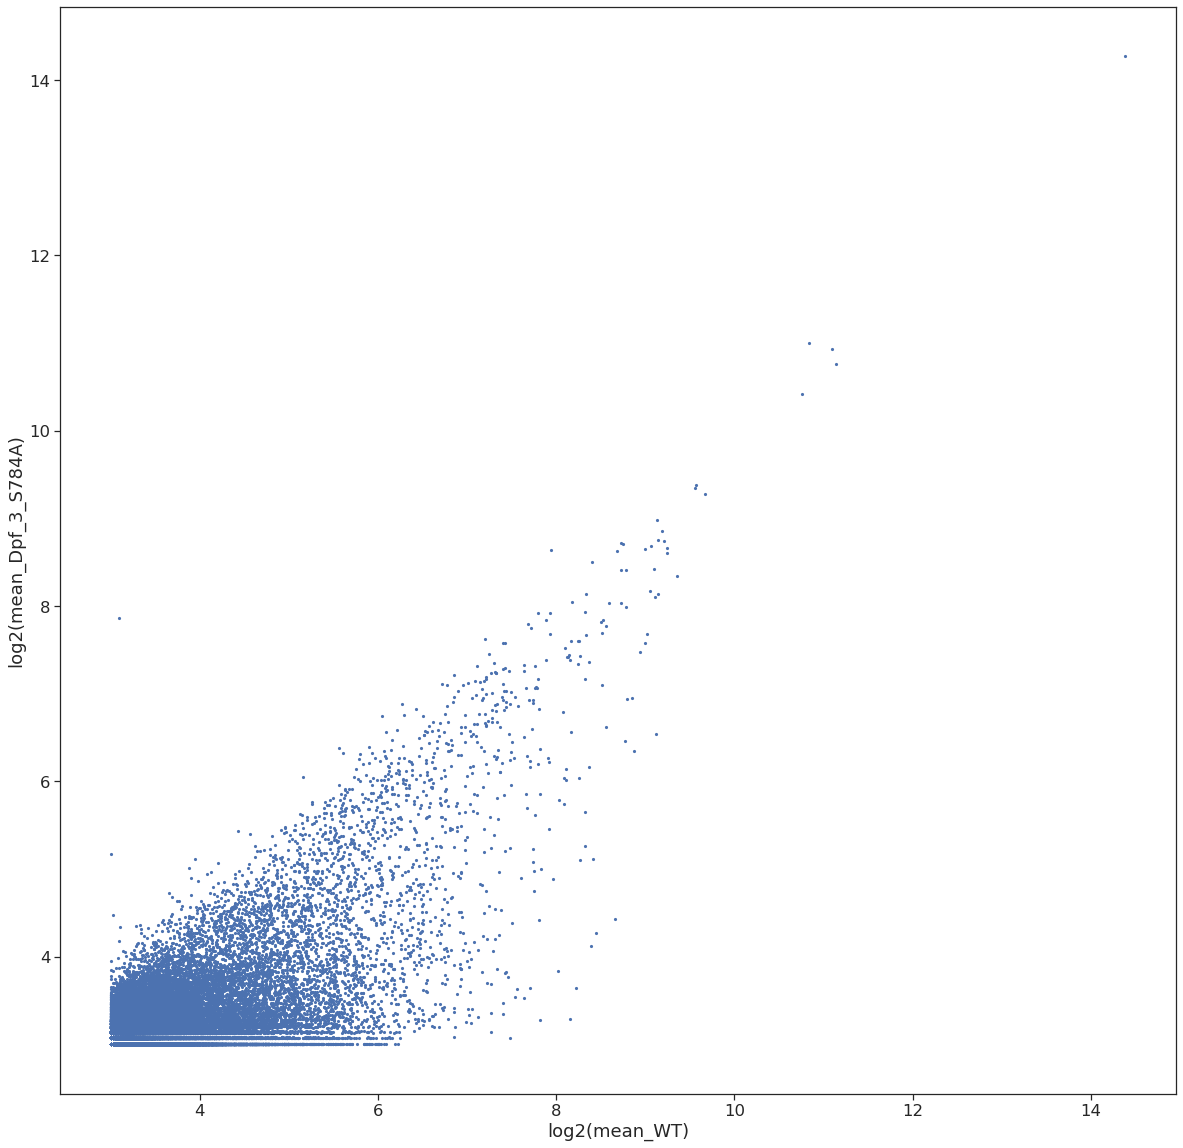

In [26]:
sns_plot = sns.scatterplot(x="log2(mean_WT)",
                           y="log2(mean_Dpf_3_S784A)",
                           data=df_22G,
                           s=s,
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

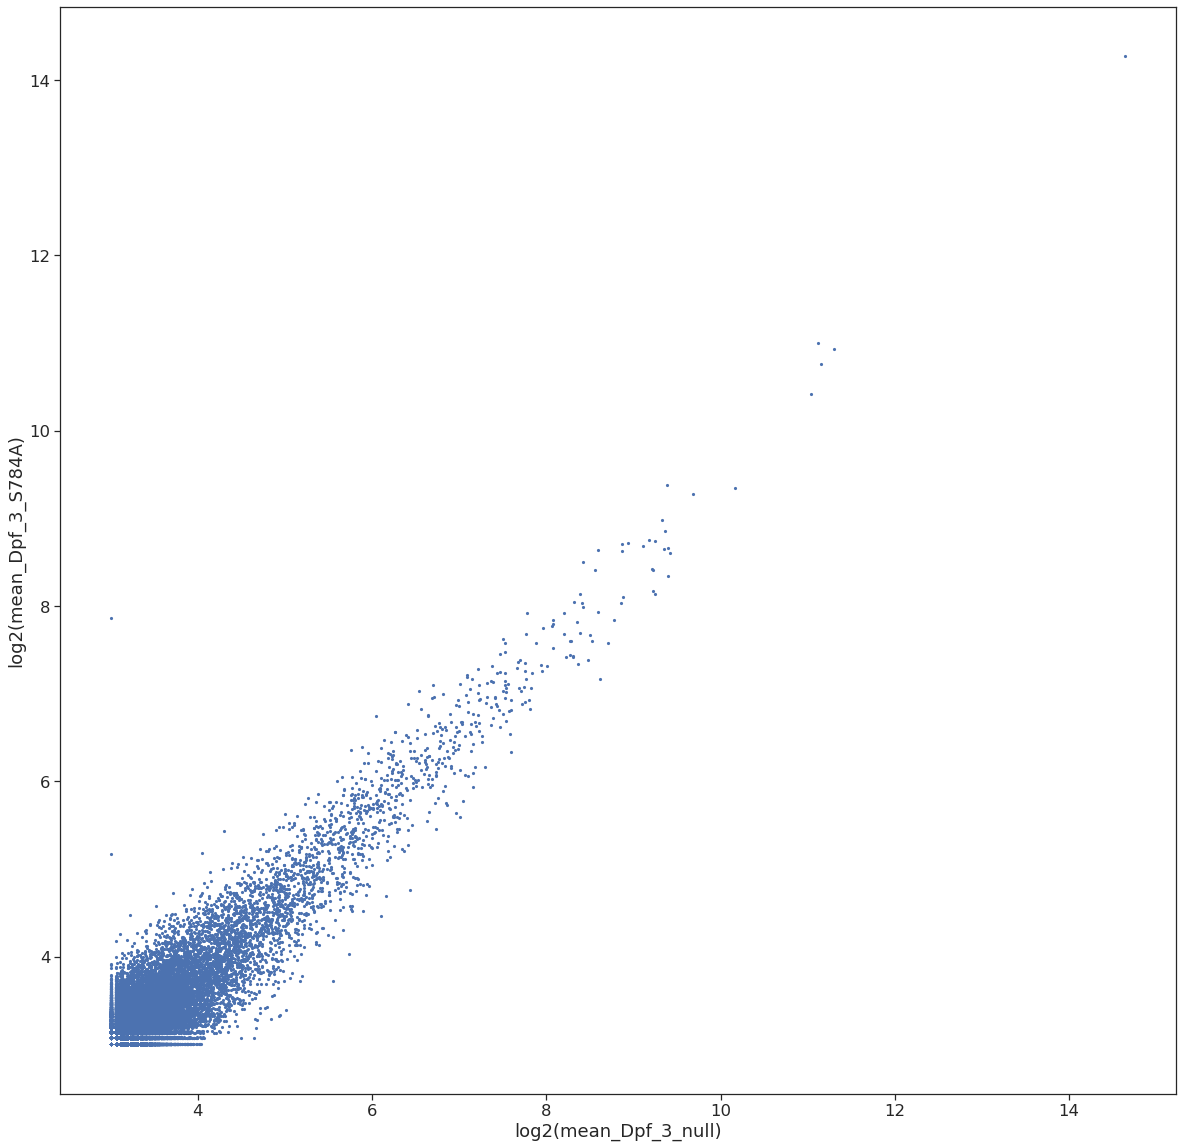

In [27]:
sns_plot = sns.scatterplot(x="log2(mean_Dpf_3_null)",
                           y="log2(mean_Dpf_3_S784A)",
                           data=df_22G,
                           s=s,
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)